In [1]:
import numpy as np
import pandas as pd

from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

import torch 
import torch.nn as nn
import torch.nn.functional as F

from astropy.io import fits

device=torch.device(0 if torch.cuda.is_available() else 'cpu')
print(device)

from basic_code.loading import loading
from basic_code.CNN_result import CNN_result
from basic_code.sampling import sampling
from basic_code.hist_plot import hist_plot
from basic_code.scatter_plot import scatter_plot
N_FIGS = 9

model_name = 'PCA'
model, Data = loading(model_name, device, no_z = False) # 0-4: 5band pho; 5: redshift; 6: VT centers; 7: Mask; 8: Reference Mass
test_set = Data[int(0.8*len(Data)):,:,:,:]
where_ctr = test_set[:,(N_FIGS-3):(N_FIGS-2),:,:].bool().reshape([len(test_set),10000]).to('cpu')

cuda:0
cuda:0


In [2]:
class CNN_noVT(nn.Module):
    band_to_index = {'u': 0, 'g': 1, 'r': 2, 'i': 3, 'z': 4}
    
    def __init__(self, bands = ['u', 'g', 'r', 'i', 'z'], mid=64 , out = 1,
                kernel_size = 5,
                n_layers  =3):
        padding = int(kernel_size/2)
        super(CNN_noVT, self).__init__()
        self.mask = list(map(lambda band: self.band_to_index[band], bands))
        self.redshift = Conv2D(6,6,1,0)
        self.conv_1 =Conv2D(len(bands)+2, mid,kernel_size, padding = padding)
        conv = []
        #self.norm = nn.BatchNorm2d(3)
        for i in range(0,n_layers-1):
            conv.append(
                nn.Conv2d(in_channels = mid, out_channels = mid, kernel_size = kernel_size, stride=1, padding = padding),
            )
            conv.append(nn.ReLU())
            #conv.append(nn.BatchNorm2d(mid))
        self.conv = nn.Sequential(*conv)
        self.conv_f1 =Conv2D(mid,int(mid/2),kernel_size,padding = padding)
        self.conv_f2 =Conv2D(int(mid/2),out,kernel_size,padding = padding)
        #self.conv_f3 =Conv2D(out,out,1,padding = 0)
    def forward(self, x):
        img = torch.cat([x[:,self.mask,:,:],x[:,5:6,:,:]],dim = 1)
        img[:,-1,:,:]*=100
        VT = torch.clone(x[:,7:,:,:])

        x_ = torch.cat([img,VT],dim=1).clone()
        x_ = self.conv_1(x_)
        x_ = self.conv(x_)
        x_ = self.conv_f1(x_)
        x_ = self.conv_f2(x_)#-np.log10(0.25)
        #x_ = 0.1*self.conv_f3(x_)+x_
        #x_ = x_*filter
        return x_, torch.log10(torch.sum(10**x_))

In [6]:
len(band_combos)

31

In [5]:
for band_combo in band_combos[:]:
    # Load the study from the SQLite database
    combo_name = f"{model_name}_{band_combo}"
    try:
        study = optuna.load_study(
            study_name= combo_name,  # Replace with your study name
            storage="sqlite:///./models/"+combo_name+".db"  # Replace with the path to your .db file
        )

        # Get the best trial
        best_trial = study.best_trial
        print(f"Best trial number: {best_trial.number}")
        f_name = f"./models/{combo_name}/{combo_name}_{best_trial.number}.pt"
        print(f_name)
    except:
        print(f"{combo_name} missing")

Best trial number: 73
./models/PCA_u/PCA_u_73.pt
Best trial number: 82
./models/PCA_g/PCA_g_82.pt
Best trial number: 99
./models/PCA_r/PCA_r_99.pt
Best trial number: 70
./models/PCA_i/PCA_i_70.pt
Best trial number: 92
./models/PCA_z/PCA_z_92.pt
Best trial number: 98
./models/PCA_ug/PCA_ug_98.pt
Best trial number: 88
./models/PCA_ur/PCA_ur_88.pt
Best trial number: 95
./models/PCA_ui/PCA_ui_95.pt
Best trial number: 62
./models/PCA_uz/PCA_uz_62.pt
Best trial number: 93
./models/PCA_gr/PCA_gr_93.pt
Best trial number: 97
./models/PCA_gi/PCA_gi_97.pt
Best trial number: 75
./models/PCA_gz/PCA_gz_75.pt
Best trial number: 76
./models/PCA_ri/PCA_ri_76.pt
Best trial number: 86
./models/PCA_rz/PCA_rz_86.pt
Best trial number: 49
./models/PCA_iz/PCA_iz_49.pt
Best trial number: 58
./models/PCA_ugr/PCA_ugr_58.pt
Best trial number: 96
./models/PCA_ugi/PCA_ugi_96.pt
Best trial number: 85
./models/PCA_ugz/PCA_ugz_85.pt
Best trial number: 72
./models/PCA_uri/PCA_uri_72.pt
PCA_urz missing
Best trial number

['u', 'g', 'r', 'i', 'z', 'ug', 'ur', 'ui', 'uz', 'gr', 'gi', 'gz', 'ri', 'rz', 'iz', 'ugr', 'ugi', 'ugz', 'uri', 'urz', 'uiz', 'gri', 'grz', 'giz', 'riz', 'ugri', 'ugrz', 'ugiz', 'uriz', 'griz', 'ugriz']
PCA_i's best trial number: 70
1652
(tensor(0.8459, dtype=torch.float64), tensor(0.1043, dtype=torch.float64))



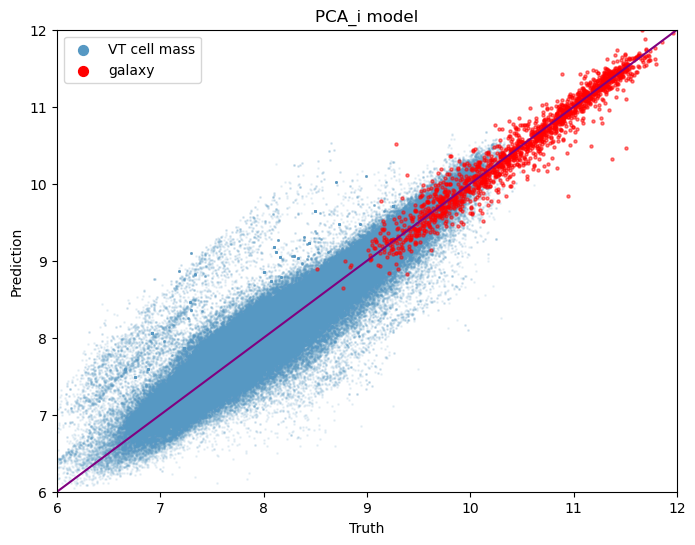

PCA_z's best trial number: 92
1652
(tensor(0.8431, dtype=torch.float64), tensor(0.0332, dtype=torch.float64))



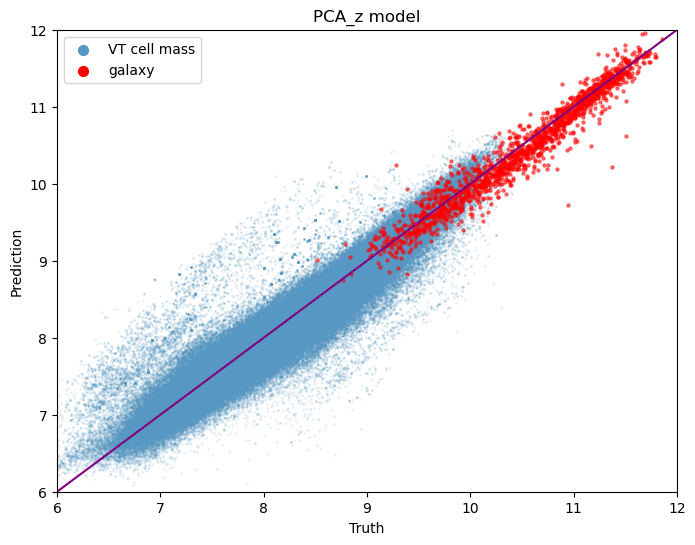

PCA_ug's best trial number: 98
1652
(tensor(0.8854, dtype=torch.float64), tensor(0.0357, dtype=torch.float64))



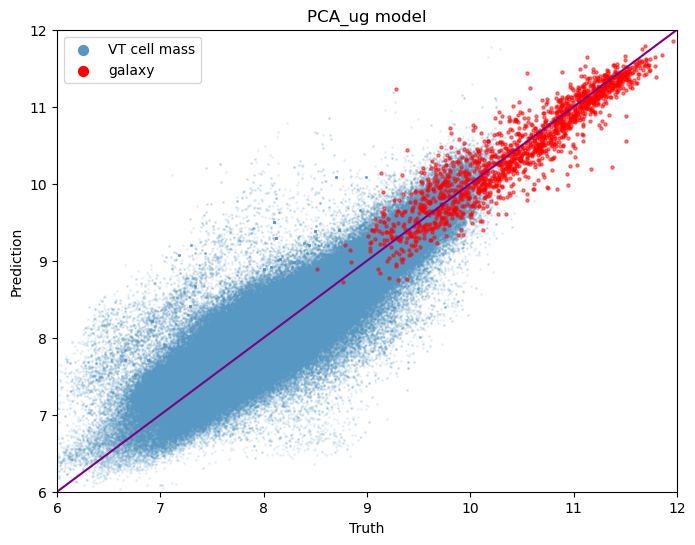

PCA_ur's best trial number: 88
1652
(tensor(0.8605, dtype=torch.float64), tensor(0.0284, dtype=torch.float64))



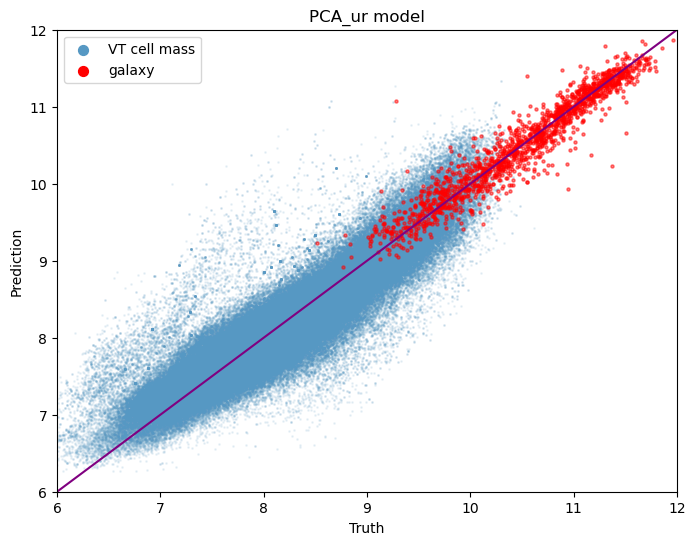

PCA_ui's best trial number: 95
1652
(tensor(0.8481, dtype=torch.float64), tensor(-0.0290, dtype=torch.float64))



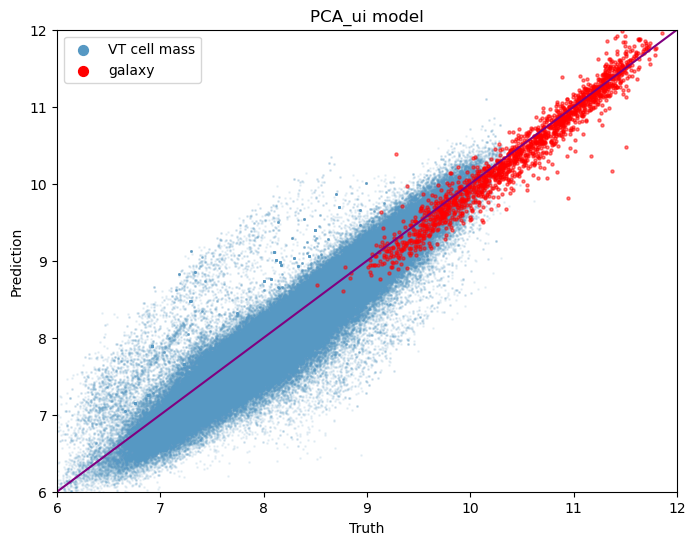

PCA_uz's best trial number: 62
1652
(tensor(0.8398, dtype=torch.float64), tensor(0.0492, dtype=torch.float64))



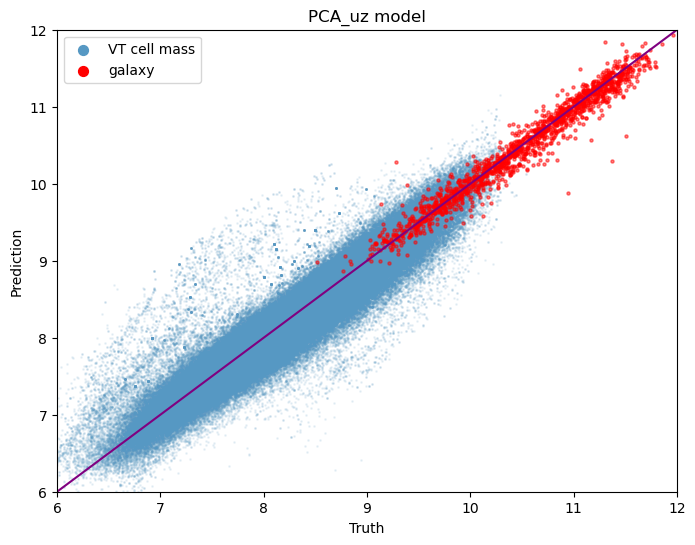

PCA_gr's best trial number: 93
1652
(tensor(0.8571, dtype=torch.float64), tensor(0.0131, dtype=torch.float64))



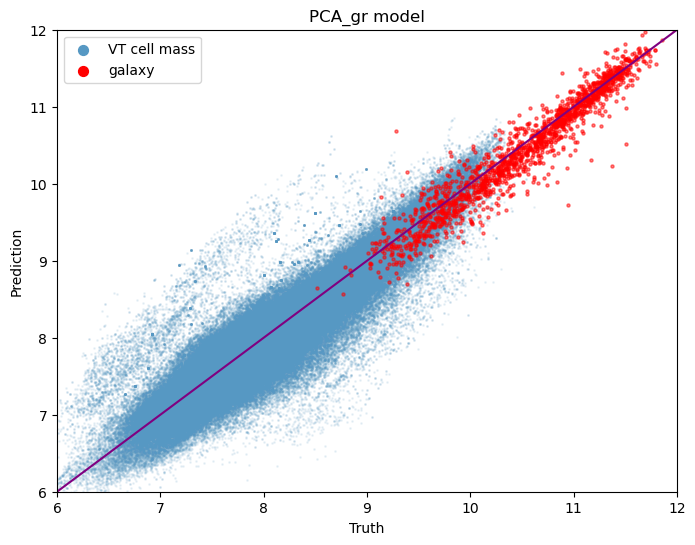

PCA_gi's best trial number: 97
1652
(tensor(0.8430, dtype=torch.float64), tensor(-0.0170, dtype=torch.float64))



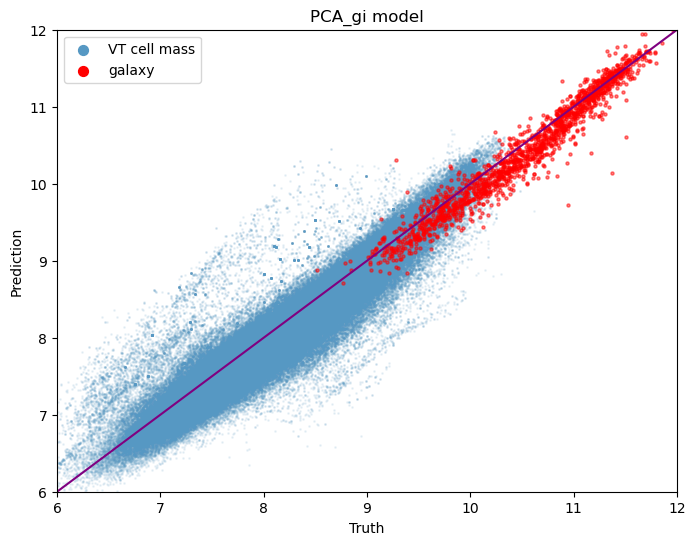

PCA_gz's best trial number: 75
1652
(tensor(0.8363, dtype=torch.float64), tensor(0.0260, dtype=torch.float64))



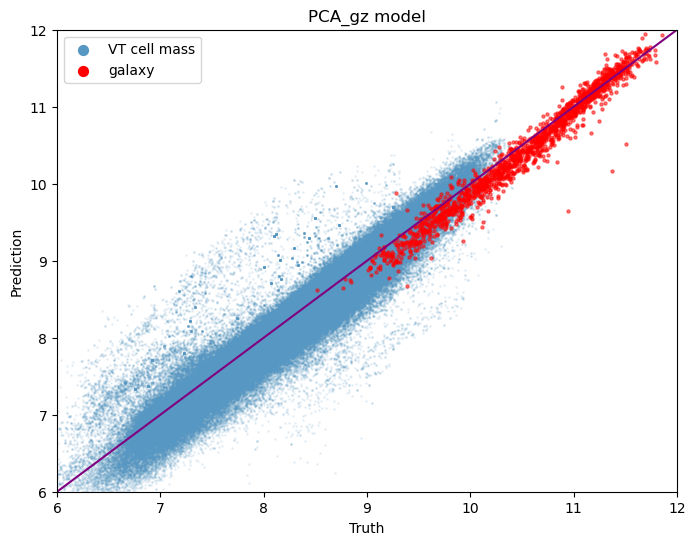

PCA_ri's best trial number: 76
1652
(tensor(0.8475, dtype=torch.float64), tensor(0.0753, dtype=torch.float64))



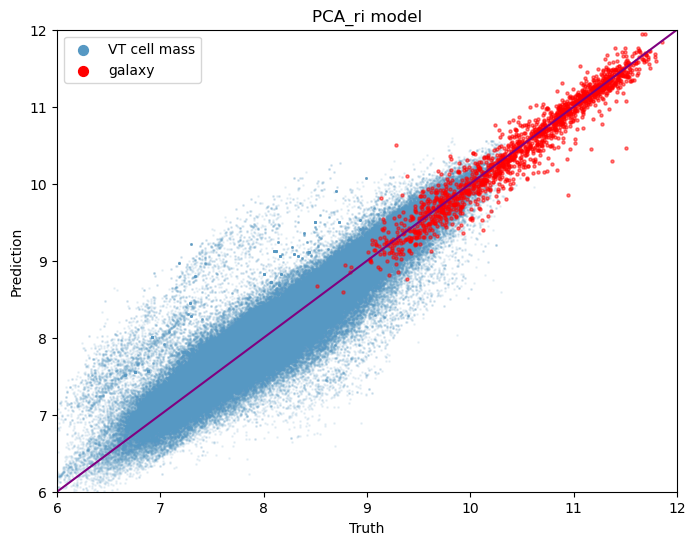

PCA_rz's best trial number: 86
1652
(tensor(0.8513, dtype=torch.float64), tensor(0.0724, dtype=torch.float64))



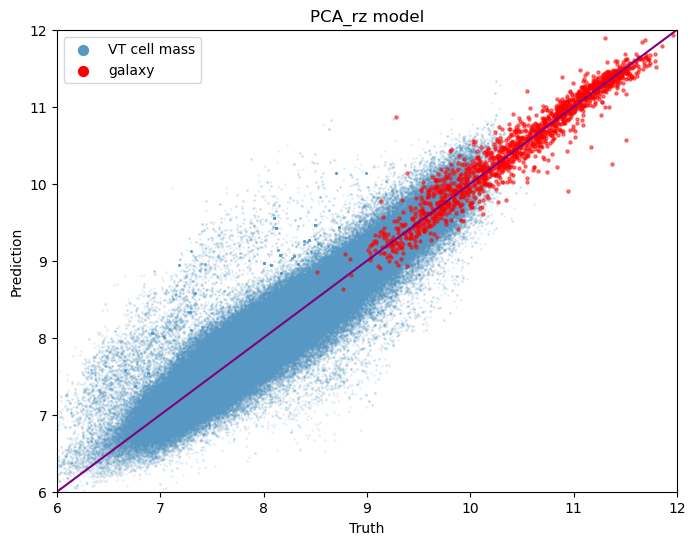

PCA_iz's best trial number: 49
1652
(tensor(0.8429, dtype=torch.float64), tensor(0.0939, dtype=torch.float64))



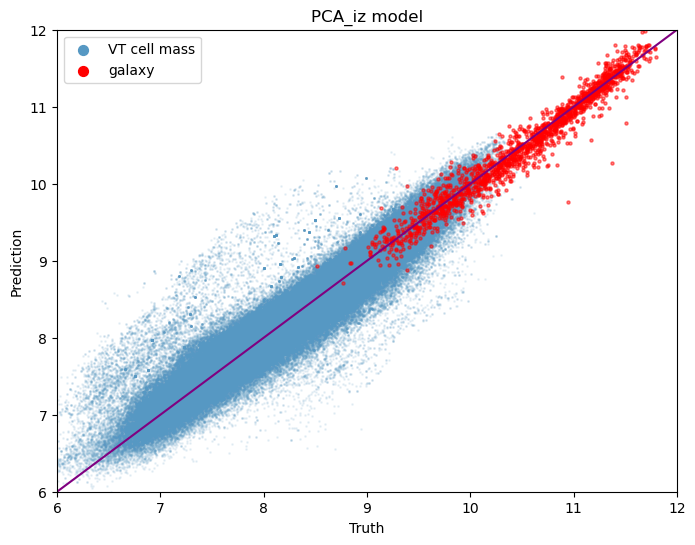

PCA_ugr's best trial number: 58
1652
(tensor(0.8495, dtype=torch.float64), tensor(0.0074, dtype=torch.float64))



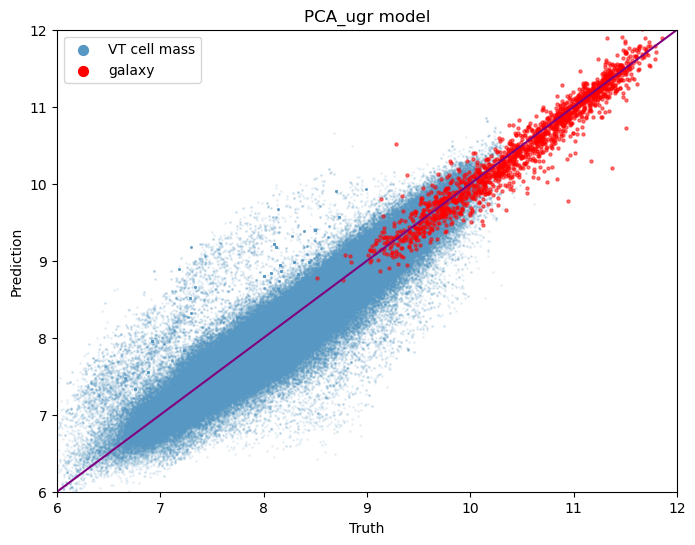

PCA_ugi's best trial number: 96
1652
(tensor(0.8389, dtype=torch.float64), tensor(0.1053, dtype=torch.float64))



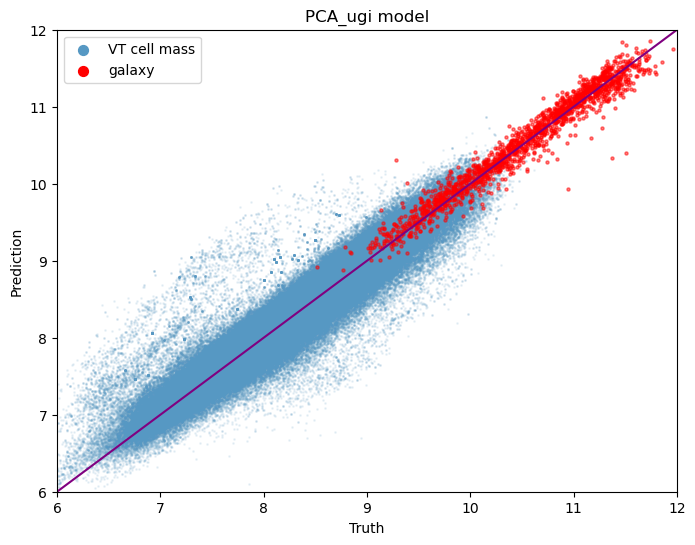

PCA_ugz's best trial number: 85
1652
(tensor(0.8363, dtype=torch.float64), tensor(0.0744, dtype=torch.float64))



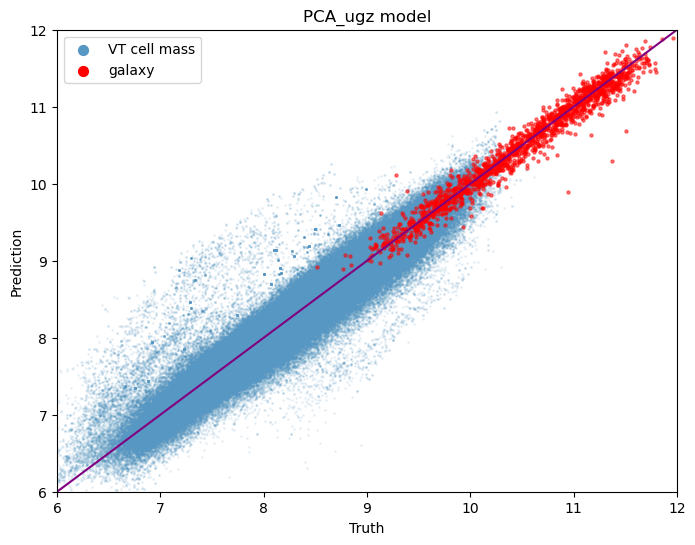

PCA_uri's best trial number: 72
1652
(tensor(0.8579, dtype=torch.float64), tensor(-0.0063, dtype=torch.float64))



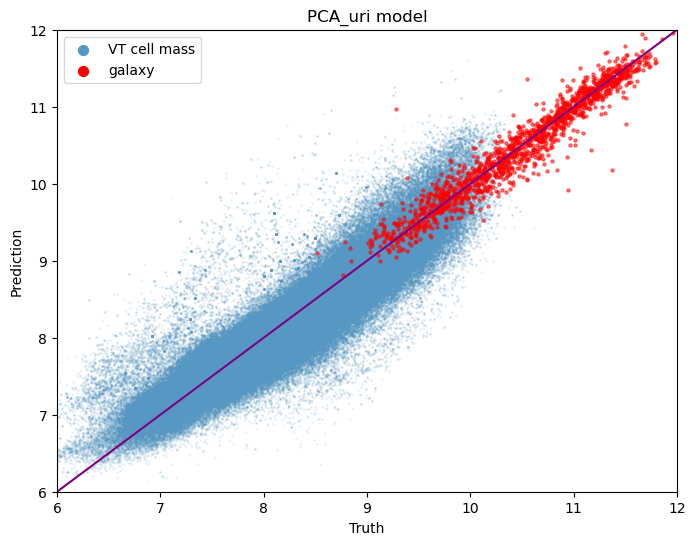

PCA_urz missing
PCA_uiz's best trial number: 52
1652
(tensor(0.8403, dtype=torch.float64), tensor(0.0489, dtype=torch.float64))



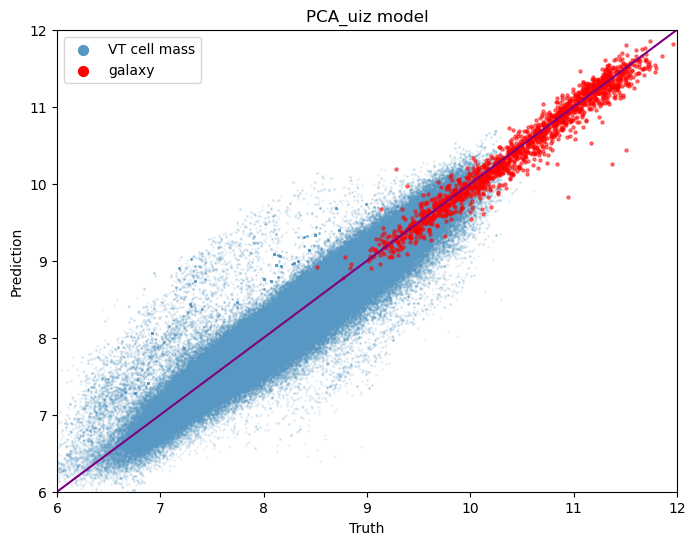

PCA_gri's best trial number: 91
1652
(tensor(0.8394, dtype=torch.float64), tensor(0.0428, dtype=torch.float64))



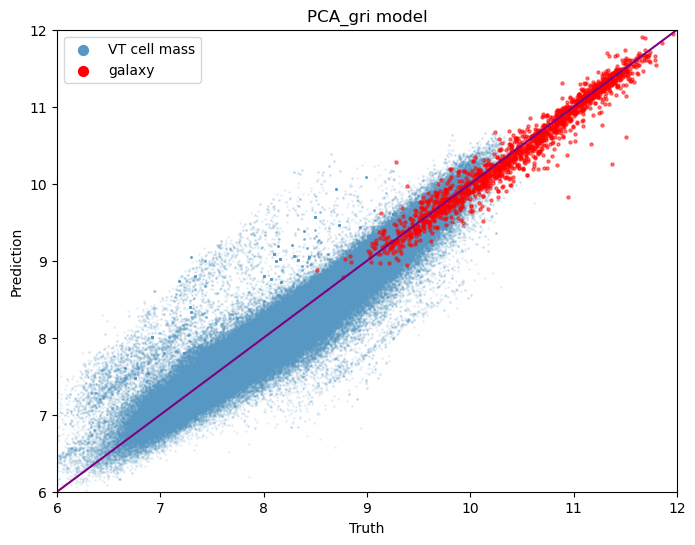

PCA_grz's best trial number: 77
1652
(tensor(0.8361, dtype=torch.float64), tensor(0.0609, dtype=torch.float64))



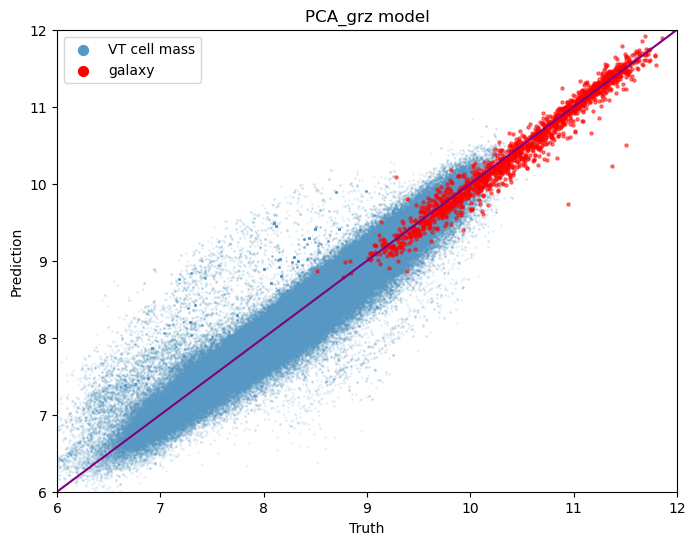

PCA_giz's best trial number: 67
1652
(tensor(0.8363, dtype=torch.float64), tensor(0.0533, dtype=torch.float64))



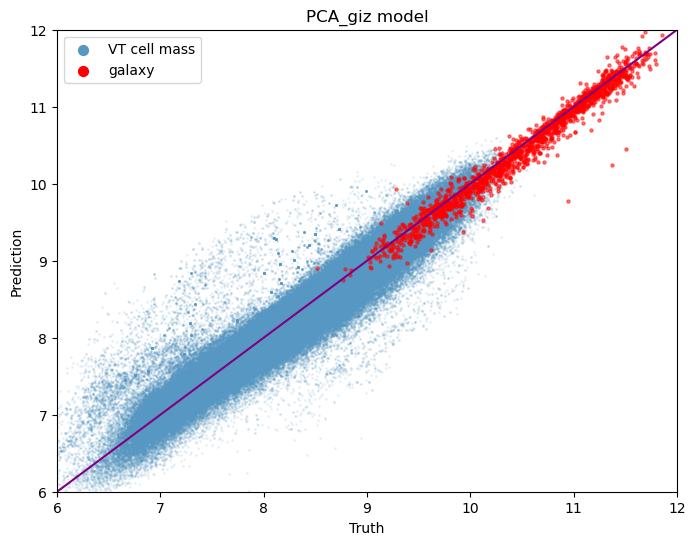

PCA_riz's best trial number: 82
1652
(tensor(0.8403, dtype=torch.float64), tensor(0.0635, dtype=torch.float64))



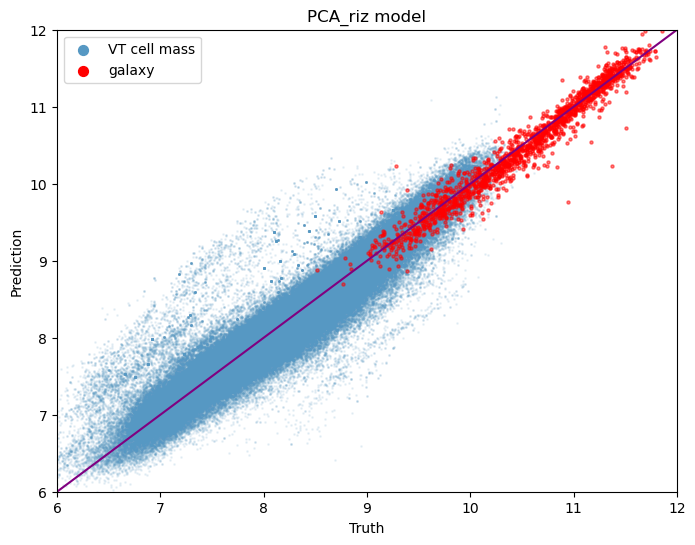

PCA_ugri's best trial number: 91
1652
(tensor(0.8400, dtype=torch.float64), tensor(0.0497, dtype=torch.float64))



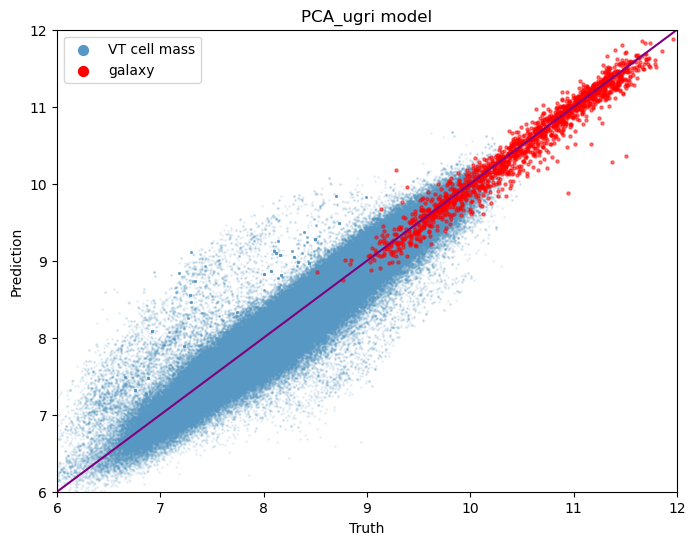

PCA_ugrz's best trial number: 95
1652
(tensor(0.8377, dtype=torch.float64), tensor(0.0006, dtype=torch.float64))



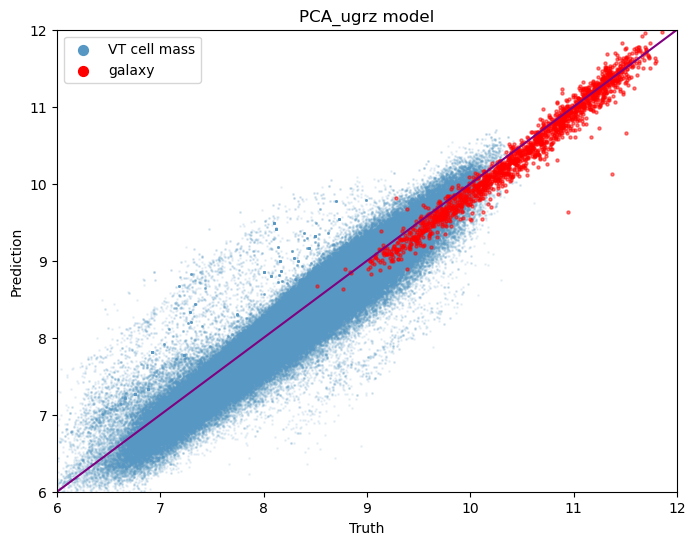

PCA_ugiz's best trial number: 99
1652
(tensor(0.8335, dtype=torch.float64), tensor(0.0345, dtype=torch.float64))



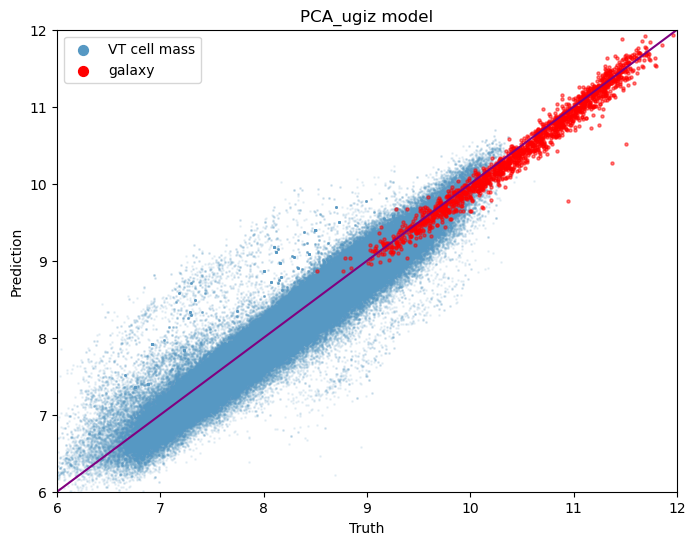

PCA_uriz's best trial number: 72
1652
(tensor(0.8475, dtype=torch.float64), tensor(0.0555, dtype=torch.float64))



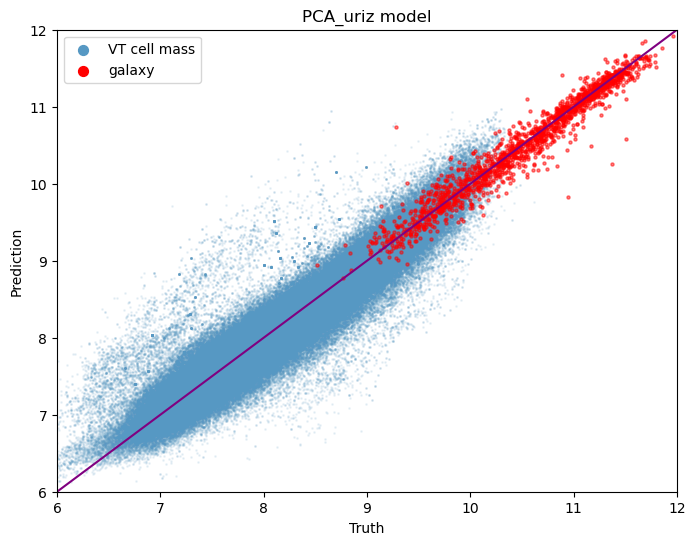

PCA_griz's best trial number: 76
1652
(tensor(0.8371, dtype=torch.float64), tensor(0.1638, dtype=torch.float64))



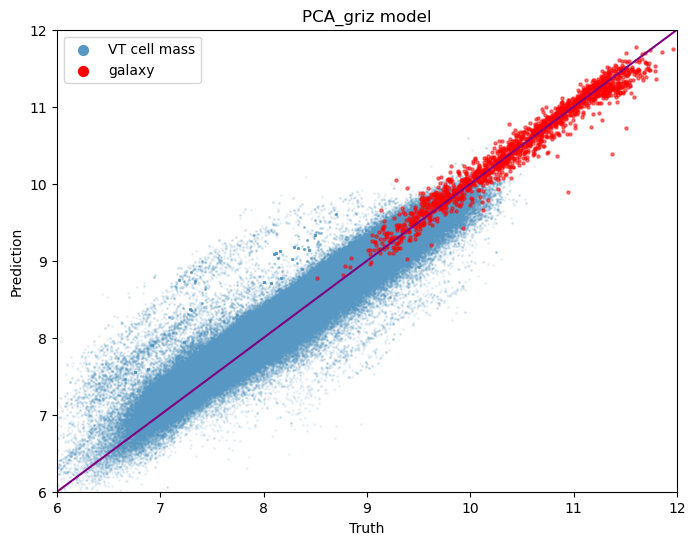

PCA_ugriz missing


In [7]:
import optuna
from itertools import combinations

#generate the name of all combinations
elements = ['u', 'g', 'r', 'i', 'z']
band_combos = []
for r in range(1, len(elements) + 1): 
    for combo in combinations(elements, r): 
        band_combos.append(''.join(combo))  
print(band_combos)

for band_combo in band_combos[3:]:
    try:
        # Load the study from the SQLite database
        combo_name = f"{model_name}_{band_combo}"
        study = optuna.load_study(
            study_name= combo_name,  # Replace with your study name
            storage="sqlite:///./models/"+combo_name+".db"  # Replace with the path to your .db file
        )
    except:
        print(f"{combo_name} missing")
        continue
    # Get the best trial
    best_trial = study.best_trial
    print(f"{combo_name}'s best trial number: {best_trial.number}")
    f_name = f"./models/{combo_name}/{combo_name}_{best_trial.number}.pt"
    model = torch.load(f_name, map_location=device)
    
    stats = sampling(model, 
                 Data.to(device), 
                 if_Gaussian= False,
                 para=[],
                 if_scramble= False)
    all_truth, all_pred, all_bell, gmass, VT_diff = stats
    scatter_plot(stats, name = combo_name, savefig = combo_name)

In [11]:
import os
import shutil
import optuna

# Assuming band_combos and model_name are defined elsewhere in your code
output_file_path = "./models/good_ones/copied_files.txt"  # Path to the output text file

# Open the output text file in write mode
with open(output_file_path, 'w') as output_file:
    for band_combo in band_combos[:]:
        try:
            # Load the study from the SQLite database
            combo_name = f"{model_name}_{band_combo}"
            study = optuna.load_study(
                study_name=combo_name,  # Replace with your study name
                storage="sqlite:///./models/"+combo_name+".db"  # Replace with the path to your .db file
            )
        except:
            print(f"{combo_name} missing")
            continue

        # Get the best trial
        best_trial = study.best_trial
        print(f"{combo_name}'s best trial number: {best_trial.number}")

        # Define the source file path
        f_name = f"./models/{combo_name}/{combo_name}_{best_trial.number}.pt"

        # Define the destination directory
        dest_dir = "./models/good_ones"

        # Create the destination directory if it doesn't exist
        os.makedirs(dest_dir, exist_ok=True)

        # Define the destination file path
        dest_f_name = os.path.join(dest_dir, os.path.basename(f_name))

        # Copy the file to the destination directory
        shutil.copy(f_name, dest_f_name)
        print(f"Copied {f_name} to {dest_f_name}")

        # Write the destination file path to the output text file
        output_file.write(dest_f_name + '\n')

print(f"All copied file paths have been saved to {output_file_path}")

PCA_u's best trial number: 73
Copied ./models/PCA_u/PCA_u_73.pt to ./models/good_ones/PCA_u_73.pt
PCA_g's best trial number: 82
Copied ./models/PCA_g/PCA_g_82.pt to ./models/good_ones/PCA_g_82.pt
PCA_r's best trial number: 99
Copied ./models/PCA_r/PCA_r_99.pt to ./models/good_ones/PCA_r_99.pt
PCA_i's best trial number: 70
Copied ./models/PCA_i/PCA_i_70.pt to ./models/good_ones/PCA_i_70.pt
PCA_z's best trial number: 92
Copied ./models/PCA_z/PCA_z_92.pt to ./models/good_ones/PCA_z_92.pt
PCA_ug's best trial number: 98
Copied ./models/PCA_ug/PCA_ug_98.pt to ./models/good_ones/PCA_ug_98.pt
PCA_ur's best trial number: 88
Copied ./models/PCA_ur/PCA_ur_88.pt to ./models/good_ones/PCA_ur_88.pt
PCA_ui's best trial number: 95
Copied ./models/PCA_ui/PCA_ui_95.pt to ./models/good_ones/PCA_ui_95.pt
PCA_uz's best trial number: 62
Copied ./models/PCA_uz/PCA_uz_62.pt to ./models/good_ones/PCA_uz_62.pt
PCA_gr's best trial number: 93
Copied ./models/PCA_gr/PCA_gr_93.pt to ./models/good_ones/PCA_gr_93.pt


In [5]:
all_trials = study.trials

# Print details of each trial
for trial in all_trials:
    print(f"Trial number: {trial.number}")
    print(f"Value: {trial.value}")
    print("Parameters:")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    print(f"State: {trial.state}")
    print("-" * 40)

Trial number: 0
Value: 0.3257971405982971
Parameters:
    num_layers: 5
    kernels_size/2: 5
    num_filters: 113
    lr: 1.1941344425594402e-05
    weight_decay: 2.2696232927012646e-06
State: 1
----------------------------------------
Trial number: 1
Value: 0.14726783335208893
Parameters:
    num_layers: 4
    kernels_size/2: 4
    num_filters: 32
    lr: 1.7934474528915116e-05
    weight_decay: 2.6438769913900873e-05
State: 1
----------------------------------------
Trial number: 2
Value: 0.36396536231040955
Parameters:
    num_layers: 4
    kernels_size/2: 2
    num_filters: 81
    lr: 2.087351459332e-06
    weight_decay: 2.0886673872618262e-05
State: 1
----------------------------------------
Trial number: 3
Value: 0.11959075182676315
Parameters:
    num_layers: 4
    kernels_size/2: 4
    num_filters: 66
    lr: 1.2019546078799378e-05
    weight_decay: 2.0386003908384667e-06
State: 1
----------------------------------------
Trial number: 4
Value: 66.53768157958984
Parameters:
   